### **Nama Anggota :**
1. Annisa Fitri Yuliandra / 2041720123
2. Inda Khoirun Nisak / 2041720020



In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Fungsi untuk load image dari drive lalu resize image menjadi setengah dari image asli,
# kemudian kumpulan image dimasukkan ke dalam array
def img_load(img_array, img_path, color):
  for img_file in glob.glob(img_path):
    n = cv.imread(img_file, color)
    scale_percent = 50
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    img_resize = cv.resize(n, dim)
    img_array.append(img_resize)
  return img_array

In [ ]:
# Load semua dataset
train_leaf1 = []
train_leaf2 = []
train_leaf3 = []
train_image = [train_leaf1, train_leaf2, train_leaf3]

path_leaf1 = '/content/drive/MyDrive/PCVK/Leaf Images/Acer_Capillipes/*.jpg'
path_leaf2 = '/content/drive/MyDrive/PCVK/Leaf Images/Acer_Circinatum/*.jpg'
path_leaf3 = '/content/drive/MyDrive/PCVK/Leaf Images/Castanea_Sativa/*.jpg'

path_image = [path_leaf1, path_leaf2, path_leaf3]

for i in range(3):
  img_load(train_image[i], path_image[i], 0)

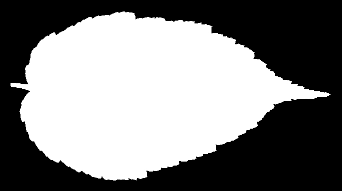

In [ ]:
cv2_imshow(train_image[0][1])

In [ ]:
# Ekstraksi data dengan deteksi tepi gambar daun menggunakan canny
edged_leaves = train_image.copy()
for i in range(len(edged_leaves)):
  for j in range(len(edged_leaves[0])):
    edged_leaves[i][j] = cv.Canny(edged_leaves[i][j], 30, 200)

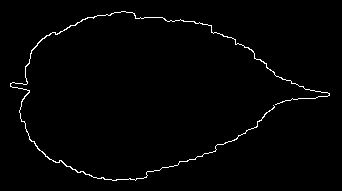

In [ ]:
cv2_imshow(edged_leaves[0][1])

In [ ]:
# Menghitung area daun pada setiap dataset
leaves_area1 = [0] * len(edged_leaves[0])
leaves_area2 = [0] * len(edged_leaves[0])
leaves_area3 = [0] * len(edged_leaves[0])

for i in range(len(edged_leaves)):
  for j in range(len(edged_leaves[0])):
    for y in range(edged_leaves[i][j].shape[0]):
      for x in range(edged_leaves[i][j].shape[1]):
        if(edged_leaves[i][j][y][x] > 0):
          if(i == 0):
            leaves_area1[j] += 1
          elif(i == 1):
            leaves_area2[j] += 1
          else:
            leaves_area3[j] += 1

In [ ]:
# Membuat data train dari data area bentuk daun
label1 = [0] * len(leaves_area1)
label2 = [1] * len(leaves_area2)
label3 = [2] * len(leaves_area3)

data1 = np.stack((leaves_area1, label1), axis=1)
data2 = np.stack((leaves_area2, label2), axis=1)
data3 = np.stack((leaves_area3, label3), axis=1)

df = pd.DataFrame(data1, columns=["Area", "Label"])
df1 = pd.DataFrame(data2, columns=["Area", "Label"])
df2 = pd.DataFrame(data3, columns=["Area", "Label"])

df = df.append(df1)
df = df.append(df2)

print("Data Train : ")
df
# shuffled = df.sample(frac=1).reset_index()
# shuffled

Data Train : 


<ipython-input-14-361252682cbb>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
<ipython-input-14-361252682cbb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


,Area,Label
0,920,0
1,921,0
2,937,0
3,931,0
4,922,0
5,943,0
6,925,0
7,910,0
8,956,0
9,912,0


In [ ]:
# Create and train the model RandomForest
X_train = df.iloc[:,0].values
X_train = X_train.reshape(-1,1)
Y_train = df.iloc[:,1].values

RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, Y_train)

def prediksi_daun_rf(area):
  prediction = RandomForestClassifier.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Capillipes"
  elif(prediction == 1):
    prediksi = "Acer_Circinatum"
  else:
    prediksi = "Castanea_Sativa"
  return prediksi

In [ ]:
# Create and train the SVM model
X_train_svm = df.iloc[:, 0].values
X_train_svm = X_train.reshape(-1, 1)
Y_train_svm = df.iloc[:, 1].values

SVMClassifier = SVC(kernel='rbf')
SVMClassifier.fit(X_train_svm, Y_train_svm)

def prediksi_daun_svm(area):
    # area = area.reshape(1, -1)
    prediction = SVMClassifier.predict(area)
    if prediction == 0:
        prediksi = "Acer_Capillipes"
    elif prediction == 1:
        prediksi = "Acer_Circinatum"
    else:
        prediksi = "Castanea_Sativa"
    return prediksi

Acer_Circinatum
[[1527]]


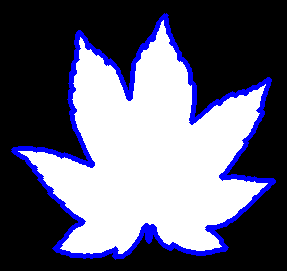

In [ ]:
# Klasifikasi menggunakan SVM
image = cv.imread('/content/drive/MyDrive/PCVK/Leaf Images/235.jpg')

# resize gambar input
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv.resize(image, dim)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged,
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = np.array([[0]])
for i in range(edged.shape[0]):
  for j in range(edged.shape[1]):
    if(edged[i,j] > 0):
      area[0][0] += 1

# Prediksi Bentuk Daun SVM
print(prediksi_daun_svm(area))

print(area)

cv2_imshow(image)

Acer_Circinatum
[[1527]]


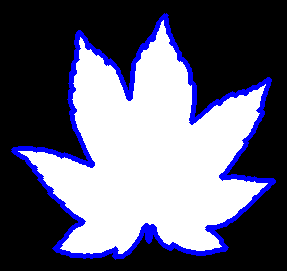

In [ ]:
# Prediksi Bentuk Daun RF
print(prediksi_daun_rf(area))

print(area)

cv2_imshow(image)

In [ ]:
# Load semua image pada folder Leaf Images
# Variabel untuk menyimpan citra asli
leaf1 = []
leaf2 = []
leaf3 = []
# Variabel untuk menyimpan citra grayscale
leaf1_gray = []
leaf2_gray = []
leaf3_gray = []

images = [leaf1, leaf2, leaf3]
images_gray = [leaf1_gray, leaf2_gray, leaf3_gray]

# Gambar dimuat menggunakan fungsi img_load()
for i in range(3):
  img_load(images[i], path_image[i], 1)
  img_load(images_gray[i], path_image[i], 0)

# Menerapkan Canny Edge Detection
edged_image = images_gray.copy()
for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    edged_image[i][j] = cv.Canny(edged_image[i][j], 30, 200)

# Menerapkan fungsi findContours() openCV
contours = [ [ None for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]
hierarchy = [ [ None for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]
for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    images[i][j] = cv.cvtColor(images[i][j], cv.COLOR_BGR2RGB)
    contours[i][j], hierarchy[i][j] = cv.findContours(edged_image[i][j],
        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cv.drawContours(images[i][j], contours[i][j], -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = [ [ 0 for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    for y in range(edged_image[i][j].shape[0]):
      for x in range(edged_image[i][j].shape[1]):
        if(edged_image[i][j][y][x] > 0):
          area[i][j] += 1


In [ ]:
# Membuat data test dengan label dari data area bentuk daun
label1 = [0] * len(area[0])
label2 = [1] * len(area[0])
label3 = [2] * len(area[0])

label = np.concatenate((label1, label2))
label = np.concatenate((label, label3))

data = []
for i in range(len(area)):
  for j in range(len(area[0])):
    data.append(area[i][j])

data = np.stack((data, label), axis=1)
df_test = pd.DataFrame(data, columns=["Area", "Label"])
df_test

,Area,Label
0,920,0
1,921,0
2,937,0
3,931,0
4,922,0
5,943,0
6,925,0
7,910,0
8,956,0
9,912,0


In [ ]:
# Menentukan X dan Y test
X_test = df_test.iloc[:,0].values
X_test = X_test.reshape(-1,1)
Y_test = df_test.iloc[:,1].values

Model Test Accuracy Score : 
100.0%


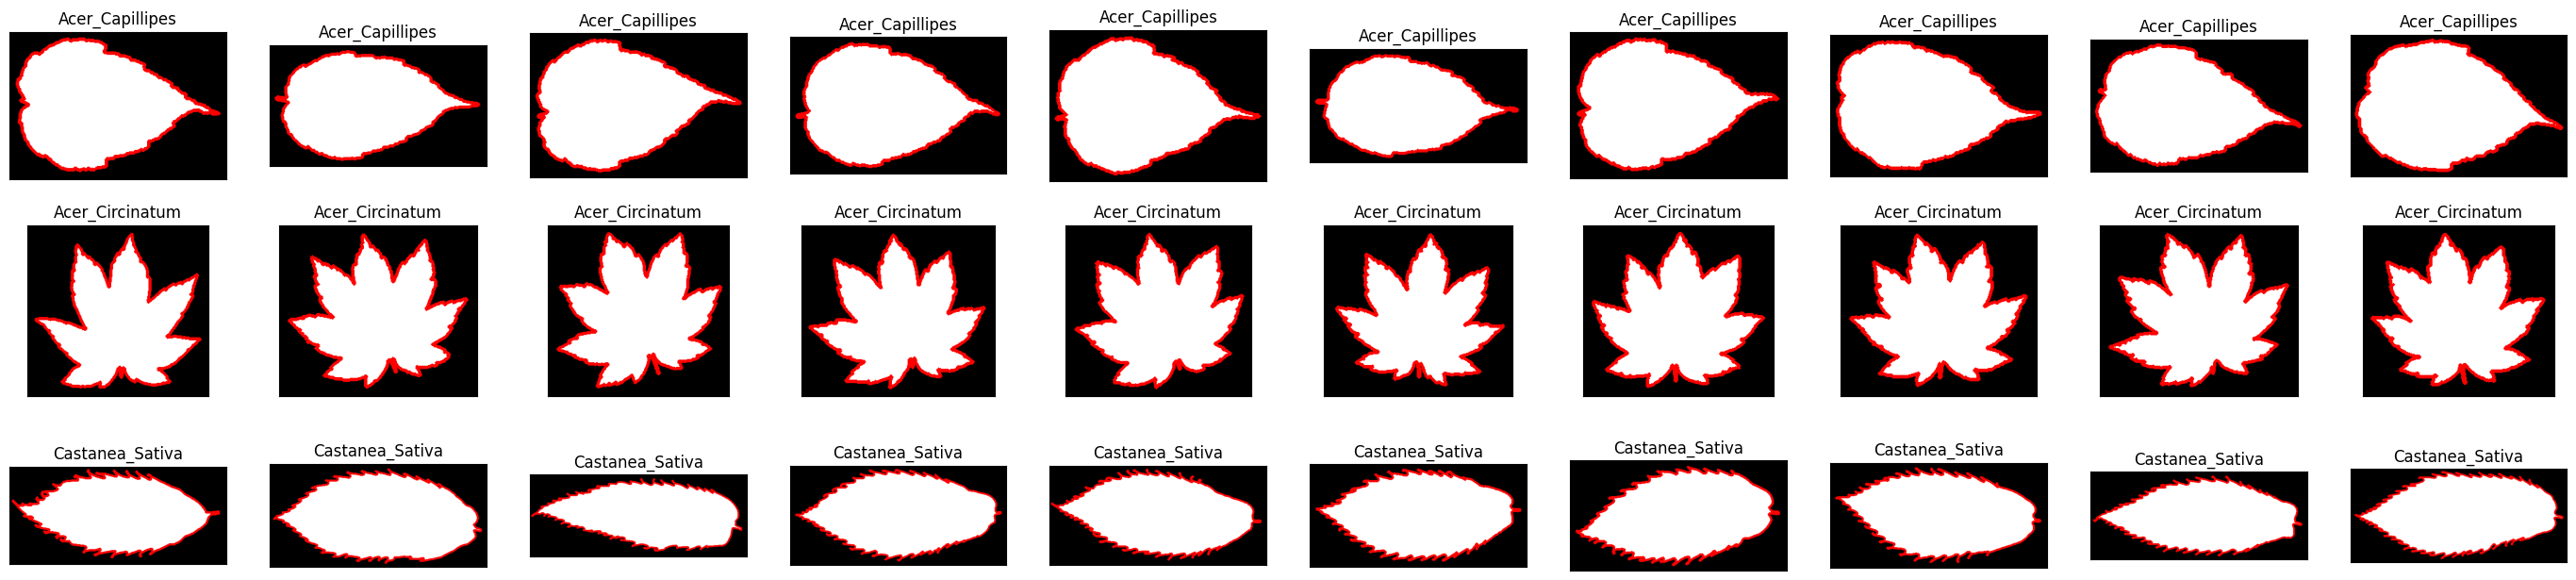

In [ ]:
# Prediksi data test menggunakan RandomForest
prediksi_rf = [ [ "" for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(prediksi_rf)):
  for j in range(len(prediksi_rf[0])):
    prediksi_rf[i][j] = prediksi_daun_rf([[area[i][j]]])

print('Model Test Accuracy Score : ')
print(str(accuracy_score(Y_test, RandomForestClassifier.predict(X_test)) * 100)+ '%')

# Membuat figure
fig = plt.figure(figsize=(35, 8))

# setting jumlah baris dan kolom
rows = len(prediksi_rf)
columns = len(prediksi_rf[0])

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(prediksi_rf[i][j])
    plt.imshow(images[i][j])
    plt.xticks([]),plt.yticks([])
    index += 1
plt.show()

Model Test Accuracy Score: 
96.66666666666667%


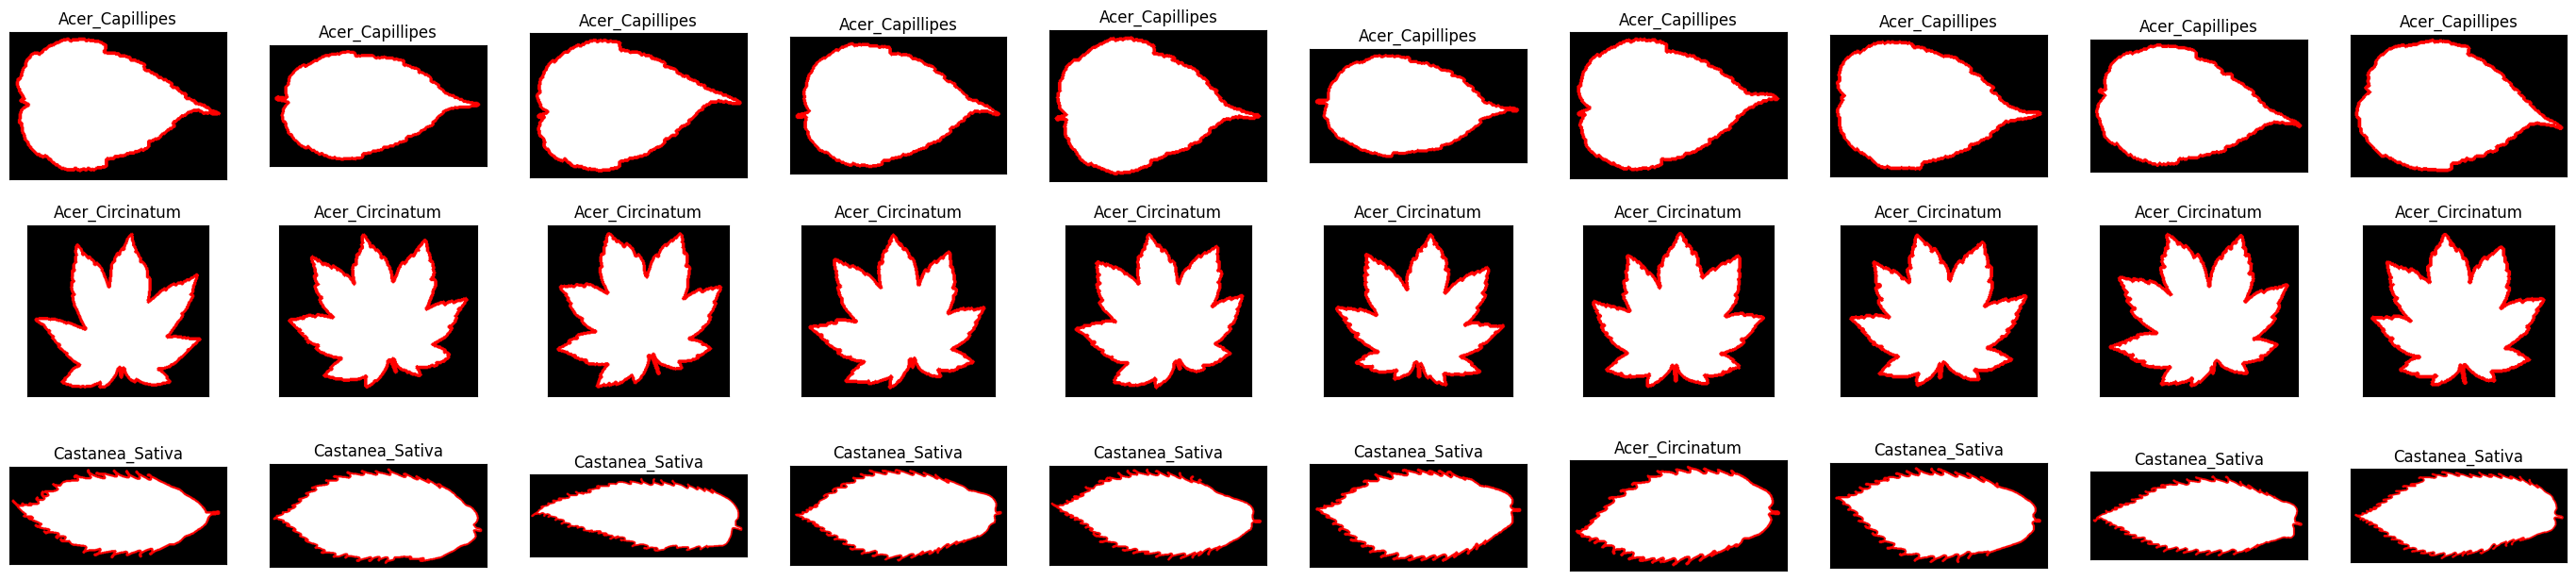

In [ ]:
# Prediksi data test menggunakan SVM
prediksi_svm = [["" for y in range(len(edged_image[i]))] for i in range(len(edged_image))]

for i in range(len(prediksi_svm)):
  for j in range(len(prediksi_svm[i])):
    prediksi_svm[i][j] = prediksi_daun_svm(np.array([area[i][j]]).reshape(1, -1))

print('Model Test Accuracy Score: ')
print(str(accuracy_score(Y_test, SVMClassifier.predict(X_test)) * 100) + '%')

# Membuat figure
fig = plt.figure(figsize=(35, 8))

# setting jumlah baris dan kolom
rows = len(prediksi_svm)
columns = len(prediksi_svm[0])

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(prediksi_svm[i][j])
    plt.imshow(images[i][j])
    plt.xticks([]), plt.yticks([])
    index += 1

plt.show()